In [10]:
# 先导三剑客
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

# 再导算法svc,GridSearchCV
from sklearn.svm import SVC
#PCA 降维
from sklearn.decomposition import PCA
#筛选出合适的参数
from sklearn.model_selection import GridSearchCV

# 再导数据集
import sklearn.datasets as datasets


# 再导logging 
import logging



In [15]:
# 打印log
logging.basicConfig(level = logging.INFO,format = '%(asctime)s%(message)s')

In [17]:
#筛选数据集
faces = datasets.fetch_lfw_people(resize=1, min_faces_per_person=70)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [20]:
faces['images'].shape

(1288, 125, 94)

In [21]:
faces['target_names']

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

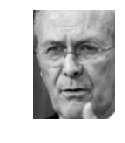

In [46]:
# 随机选取一张图片
index = np.random.randint(1288,size=1)[0]
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(faces['images'][index],cmap='gray')

In [49]:
#查看人脸结构
faces['images'].shape

(1288, 125, 94)

In [53]:
# 定义训练数据集,预测数据集
X = faces['data']

y = faces['target']

target_names = faces['target_names']
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [54]:
X.shape
# 11750个属性,这里我们取出300个重要的特征
#即取出权重大于90%的特征


(1288, 11750)

In [59]:
# 因数据属性太多,计算复杂,这里我们选用鸢尾花演示,
# 先加载鸢尾花数据
iris = datasets.load_iris()['data']
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# PCA 降维
主成分分析（Principal Components Analysis），简称PCA，是一种数据降维技术，用于数据预处理。一般我们获取的原始数据维度都很高，比如1000个特征，在这1000个特征中可能包含了很多无用的信息或者噪声，真正有用的特征才100个，那么我们可以运用PCA算法将1000个特征降到100个特征。这样不仅可以去除无用的噪声，还能减少很大的计算量。
原始数据集dataMat 行代表样本,列代表特征
1)零均值化,行代表样本,列代表特征,
零均值化就是求每一列的平均值,然后该列上的所有数都减去这个均值
menaVal = np.mean(dataMat,axis = 0)#按列求均值,即求各个特征的均值
newData = dataMat - meanVal
2)求协方差矩阵
covMat = np.cov(newData,rowvar = 0)
rowvar = 0 传入的数据一行代表一份样本
若非0 说明传入的数据一列代表一个样本
3)求特征值,特征矩阵
eigVals,eigVects = np.linalg.eig(covMat)
eigVals存放特征值,行向量
eigVects 存放特征向量,每一列代表一个特征向量
特征值和特征向量是一一对应的
4)保留主要成分[即保留值比较大的前n个特征]
    -第三步得到的特征值向量eigVals,对其从小到大排序,np.argsort(eigVals)
    -取出排在前面最大的n个特征向量(根据下表取),
     它们组成了一个新的特征空间的一组基n_eigVect.
    -将零均值化后的数据乘以n_eigVect就可以得到降维后的数据lowDDataMat
    -重构数据:乘以n_eigVect的转置矩阵,再加上均值meanVal
    (eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序  
     n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标  
     n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量  
     lowDDataMat=newData*n_eigVect               #低维特征空间的数据  
     reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据  )
*)如何选择主成分个数,降到几维数据,即n取多少合适,
    一般通过方差百分比实现.(特征值从大到小排列,前n个求和/总和 >0.99)
    (def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   #升序  
    sortArray=sortArray[-1::-1]  #逆转，即降序  
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num )
    

In [68]:

#1_零平均值化,行是样本,列是特征
# 求平均值
iris.mean(axis=0)

# 求B向量,每个数据减去平均值
B = iris - iris.mean(axis=0)
B

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

In [69]:
# 2_求解协方差矩阵,行是样本
C = np.cov(B,rowvar=False)
print(C.shape)
C

(4, 4)


array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [76]:
# 3_求特征值,特征向量(第一个特征值,第二个特征向量)
# np.linalg.eigvals(C)
T,T_ = np.linalg.eig(C)
display(T,T_)

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

# 4_保留主要成分
4)保留主要成分[即保留值比较大的前n个特征]
    -第三步得到的特征值向量eigVals,对其从小到大排序,np.argsort(eigVals)
    -取出排在前面最大的n个特征向量(根据下表取),
     它们组成了一个新的特征空间的一组基n_eigVect.
    -将零均值化后的数据乘以n_eigVect就可以得到降维后的数据lowDDataMat
    -重构数据:乘以n_eigVect的转置矩阵,再加上均值meanVal
    (eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序  
     n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标  
     n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量  
     lowDDataMat=newData*n_eigVect               #低维特征空间的数据  
     reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据  )
*)如何选择主成分个数,降到几维数据,即n取多少合适,
    一般通过方差百分比实现.(特征值从大到小排列,前n个求和/总和 >0.99)
    (def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   #升序  
    sortArray=sortArray[-1::-1]  #逆转，即降序  
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num )

In [77]:
T

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [88]:
t1 = np.sort(T)
t2 = t1[-1::-1]
display(T,t1,t2)

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

array([0.02368303, 0.07852391, 0.24224357, 4.22484077])

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
#    (def percentage2n(eigVals,percentage):  
#     sortArray=np.sort(eigVals)   #升序  
#     sortArray=sortArray[-1::-1]  #逆转，即降序  
#     arraySum=sum(sortArray)  
#     tmpSum=0  
#     num=0  
#     for i in sortArray:  
#         tmpSum+=i  
#         num+=1  
#         if tmpSum>=arraySum*percentage:  
#             return num )

In [94]:
# 求取n 即降多少维合适
def percentage2n(eigVals,percentage):
    sortArray = np.sort(eigVals) # 排序,从小到大排序
    sortArray = sortArray[-1::-1] # 逆序,实现从大到小排序
    arraySum = sum(sortArray) # 求取
    tmpSum = 0
    num = 0
    for i in sortArray:
        tmpSum += i
        num += 1
        if tmpSum >= arraySum*percentage:
            return num

In [103]:
# eigVals = T
# percentage = 0.99
n = percentage2n(T,0.97)
n
# 取鸢尾花前两个特征已达到0.97

2

In [106]:
T_

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [104]:
T_[:,:2]

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [107]:
#降成二维
pca = PCA(2)
pca.fit_transform(iris)
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

In [108]:
pca.explained_variance_

array([4.22484077, 0.24224357])